In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
plt.style.use('seaborn')

### Define file location of pulsed measurement

In [1]:
path = 'G:\\Data\\Qudi_Data\\2023\\11\\20231106\\PulsedMeasurement\\'
# path = 'G:\\Data\\Qudi_Data\\2023\\10\\20231023\\PODMR\\'
filebeginning = '20231106-0927-38_setD_24mTBnv_FC_10K_IC_-3dbm_T1_pulsed_measurement' #here the beginning of the filename, including the date and sample name, is needed
filepath = path + filebeginning

### Load and plot pulsed measurement

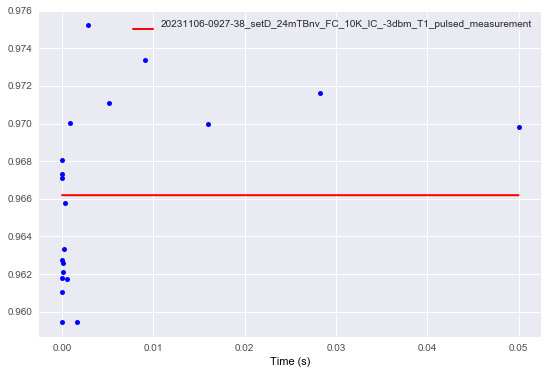

In [3]:
#Gathering data from dictonary
data_raw = np.loadtxt(filepath + '.dat').T
var_list = data_raw[0]

mode = 'bi_exp'
plot_option = 2 #1 = Signal1, 2 = Signal2, 3 = delta of signals
err = None

#Choose what to plot
if plot_option == 3:
    data = data_raw[1] - data_raw[2]
    shift = (data_raw.shape[0]-1)//2
    err1 = abs(data_raw[1+shift])
    err2 = abs(data_raw[2+shift])
    err = err1+err2
else:
    data = data_raw[plot_option]
    shift = (data_raw.shape[0]-1)//2
    err = data_raw[plot_option+shift]
leg = filebeginning+'\n'

plt.xlabel('Frequency (Hz)')

#Determine fi
if mode == 'exp_decay':
    fit = afm_scanner_logic._fitlogic.make_decayexponential_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_decayexponential)
    lm,_ = fitlogic.make_decayexponential_model()
    leg += f"Lifetime ({mode}): {round(fit.params['lifetime']*1e6,2)} us +- {round(fit.params['lifetime'].stderr*1e6,2)} us"
    plt.xlabel('Time (s)')

elif mode == 'exp_decay_stretched':
    fit = afm_scanner_logic._fitlogic.make_decayexponentialstretched_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_decayexponentialstretched)
    lm,_ = fitlogic.make_decayexponentialstretched_model()
    leg += f"Lifetime ({mode}): {round(fit.params['lifetime']*1e6,2)} us +- {round(fit.params['lifetime'].stderr*1e6,2)} us"
    plt.xlabel('Time (s)')
    
elif mode == 'bi_exp':
    fit = afm_scanner_logic._fitlogic.make_biexponential_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_biexponential)
    lm,_ = fitlogic.make_biexponential_model()
#     leg += f"Lifetime ({mode}): {round(fit.params['lifetime']*1e6,2)} us +- {round(fit.params['lifetime'].stderr*1e6,2)} us"
    plt.xlabel('Time (s)')    
    
elif mode == 'double':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_dip)
    lm,_ = fitlogic.make_lorentziandouble_model()
    
elif mode == 'N15':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N15)
    lm,_ = fitlogic.make_lorentziandouble_model()
    
elif mode == 'N14':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N14)
    lm,_ = fitlogic.make_lorentziandouble_model()
    
else:    
    fit = afm_scanner_logic._fitlogic.make_lorentzian_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentzian_dip)
    lm,_ = fitlogic.make_lorentzian_model()
    leg += f"FWHM ({mode}): {round(fit.params['fwhm']*1e-6,2)} MHz +- {round(fit.params['fwhm'].stderr*1e-6,2)} MHz"

# print(fit.fit_report())

#Plot Data an
plt.plot(var_list,data,'bo')
# if not err is None:
#     plt.errorbar(x=var_list, y=data,
#                  yerr=err, fmt='-o', color='blue',
#                  capsize=2, capthick=0.9,
#                  elinewidth=1.2)

x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
plt.plot(x, lm.eval(fit.params, x=x),'r-',label=leg)

plt.legend()

plt.rcParams['figure.figsize'] = (9, 6)
fontsize = 12
with open(filepath+f'_jupyter_plot_{plot_option}_{mode}.png', 'wb') as f:
    plt.savefig(f,format='png',dpi=600)
plt.show()



In [ ]:
T1_1 = 2771e-6 #err 1007e-6